# 안녕하세요:)

## AIVLE 2차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## [프로젝트 흐름]

0.튜토리얼에서 주민등록 데이터를 함께 전처리/체험 해 봅니다.

1.서울시 버스 정류장 데이터를 전처리/분석 합니다.

2.서울시 유동인구 데이터를 전처리/분석 합니다.

3.서울시 주민등록 데이터를 전처리/분석 합니다.

4.서울시 업종등록 데이터를 전처리/분석 합니다.

### 5.위 4개 데이터를 합쳐서 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [75]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [78]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [79]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [80]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [81]:
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,496,95,7605690,7218161,114.536624,108.700696
1,강동구,360,22,2769288,2702980,86.337896,84.270616
2,강북구,412,67,4619962,4476588,123.005458,119.188157
3,강서구,566,48,4599504,4573299,83.868276,83.390449
4,관악구,465,81,6780412,6924027,130.903566,133.676217


In [82]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8', index_col=0)

In [83]:
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
0,11010,29797989,21031880.41,60.903702,42.986773
1,11020,29871978,22491167.48,59.909546,45.107011
2,11030,27170933,15702426.81,59.739050,34.523955
3,11040,27556207,18138400.81,59.495957,39.162194
4,11050,27336591,18876549.38,62.520935,43.172154


In [84]:
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8', thousands=',')

In [85]:
df_seoul_business.head()

,Unnamed: 0,자치구,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,다수업종 상위10.8,다수업종 상위10.9,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,0,자치구,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,두발미용업,두발미용업,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,1,자치구,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,2,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636","18,080","36,214","16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,3,종로구,215,215,"1,548","5,912",618,646,549,889,261,480,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,4,종로구,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220


In [86]:
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [87]:
df_seoul_people.head()

,동별(2),소계,남자,여자,65세이상고령인
0,종로구,141379,68395,72984,27958
1,중구,120437,58563,61874,25055
2,용산구,218650,105087,113563,39037
3,성동구,281000,136633,144367,47720
4,광진구,337416,162541,174875,54071


In [88]:
df_seoul_people = df_seoul_people.rename(columns = {'동별(2)' : '자치구'})

In [89]:
df_seoul_people

,자치구,소계,남자,여자,65세이상고령인
0,종로구,141379,68395,72984,27958
1,중구,120437,58563,61874,25055
2,용산구,218650,105087,113563,39037
3,성동구,281000,136633,144367,47720
4,광진구,337416,162541,174875,54071
5,동대문구,336644,165755,170889,64468
6,중랑구,385318,189537,195781,74920
7,성북구,430397,206961,223436,77475
8,강북구,293660,142567,151093,66307
9,도봉구,311694,151398,160296,66998


In [90]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [91]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [92]:
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [93]:
df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [97]:
df.columns[13:-4]

Index(['다수업종 상위10', '다수업종 상위10.1', '다수업종 상위10.2', '다수업종 상위10.3', '다수업종 상위10.4',
       '다수업종 상위10.5', '다수업종 상위10.6', '다수업종 상위10.7', '다수업종 상위10.8',
       '다수업종 상위10.9', '다수업종 상위10.10', '다수업종 상위10.11', '다수업종 상위10.12',
       '다수업종 상위10.13', '다수업종 상위10.14', '다수업종 상위10.15', '다수업종 상위10.16',
       '다수업종 상위10.17', '다수업종 상위10.18', '다수업종 상위10.19'],
      dtype='object')

In [98]:
for i in df.columns[13:-4]:
    df[i] = df[i].str.replace(',','') #.1이면 종사자, 아니면 사업체
    df[i] = df[i].str.replace('-','0')
    df[i] = df[i].astype('int')

In [99]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),Unnamed: 0,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,다수업종 상위10.8,다수업종 상위10.9,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19,소계,남자,여자,65세이상고령인
0,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,3,215,215,1548,5912,618,646,549,889,261,480,948,3613,400,962,537,1413,110,382,437,1982,141379,68395,72984,27958
1,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,4,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220,141379,68395,72984,27958
2,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,5,5,5,42,145,4,4,9,10,0,0,66,243,2,3,3,8,0,0,7,33,141379,68395,72984,27958
3,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,6,22,22,26,100,9,9,17,26,8,10,24,62,3,6,7,23,16,59,3,15,141379,68395,72984,27958
4,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,7,10,10,31,116,11,11,33,52,19,28,19,62,2,4,26,54,25,71,10,103,141379,68395,72984,27958


In [100]:
df.columns

Index(['도착 시군구 코드', '자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수',
       '하차평균승객수', '총 이동 시간', '총 이동 인구', '평균 이동 시간(분)', '이동인구(합)', 'Unnamed: 0',
       '다수업종 상위10', '다수업종 상위10.1', '다수업종 상위10.2', '다수업종 상위10.3', '다수업종 상위10.4',
       '다수업종 상위10.5', '다수업종 상위10.6', '다수업종 상위10.7', '다수업종 상위10.8',
       '다수업종 상위10.9', '다수업종 상위10.10', '다수업종 상위10.11', '다수업종 상위10.12',
       '다수업종 상위10.13', '다수업종 상위10.14', '다수업종 상위10.15', '다수업종 상위10.16',
       '다수업종 상위10.17', '다수업종 상위10.18', '다수업종 상위10.19', '소계', '남자', '여자',
       '65세이상고령인'],
      dtype='object')

In [101]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),Unnamed: 0,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,다수업종 상위10.8,다수업종 상위10.9,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19,소계,남자,여자,65세이상고령인
0,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,3,215,215,1548,5912,618,646,549,889,261,480,948,3613,400,962,537,1413,110,382,437,1982,141379,68395,72984,27958
1,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,4,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220,141379,68395,72984,27958
2,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,5,5,5,42,145,4,4,9,10,0,0,66,243,2,3,3,8,0,0,7,33,141379,68395,72984,27958
3,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,6,22,22,26,100,9,9,17,26,8,10,24,62,3,6,7,23,16,59,3,15,141379,68395,72984,27958
4,11010,종로구,345,103,4962972,4787384,116.751088,112.62048,29797989,21031880.41,60.903702,42.986773,7,10,10,31,116,11,11,33,52,19,28,19,62,2,4,26,54,25,71,10,103,141379,68395,72984,27958


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 447
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   도착 시군구 코드     448 non-null    int64  
 1   자치구           448 non-null    object 
 2   정류장수          448 non-null    int64  
 3   노선수           448 non-null    int64  
 4   승차총승객수        448 non-null    int64  
 5   하차총승객수        448 non-null    int64  
 6   승차평균승객수       448 non-null    float64
 7   하차평균승객수       448 non-null    float64
 8   총 이동 시간       448 non-null    int64  
 9   총 이동 인구       448 non-null    float64
 10  평균 이동 시간(분)   448 non-null    float64
 11  이동인구(합)       448 non-null    float64
 12  Unnamed: 0    448 non-null    int64  
 13  다수업종 상위10     448 non-null    int32  
 14  다수업종 상위10.1   448 non-null    int32  
 15  다수업종 상위10.2   448 non-null    int32  
 16  다수업종 상위10.3   448 non-null    int32  
 17  다수업종 상위10.4   448 non-null    int32  
 18  다수업종 상위10.5   448 non-null    

In [103]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [104]:
df.columns = ['도착 시군구 코드', '자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수',
       '하차평균승객수', '총 이동 시간', '총 이동 인구', '평균 이동 시간(분)', '이동인구(합)','택시운송업 - 사업체','택시운송업 - 종사자',	'한식 일반 음식점업 - 사업체',	'한식 일반 음식점업 - 종사자',
                               '용달 화물자동차 운송업 - 사업체',	'용달 화물자동차 운송업 - 종사자',	'부동산 중개 및 대리업 - 사업체',	'부동산 중개 및 대리업 - 종사자',
                               '두발미용업 - 사업체',	'두발미용업 - 종사자',	'커피전문점 - 사업체',	'커피전문점 - 종사자',	'남녀용 겉옷 및 셔츠 도매업 - 사업체',	
                               '남녀용 겉옷 및 셔츠 도매업 - 종사자',	'기타주점업 - 사업체',	'기타주점업 - 종사자',	'일반 교과 학원 - 사업체',	'일반 교과 학원 - 종사자',
                               '한식 육류요리 전문점 - 사업체',	'한식 육류요리 전문점 - 종사자', '소계', '남자', '여자','65세이상고령인']

In [109]:
df['승하차평균승객수'] = df['승차평균승객수'] + df['하차평균승객수']
df['승하차총승객수'] = df['승차총승객수'] + df['하차총승객수']
df['노선별 정류장수'] = df['정류장수'] / df['노선수'] # 하차평균승객수 / 승차평균승객수  > -0.54 / -0.58

<AxesSubplot:>

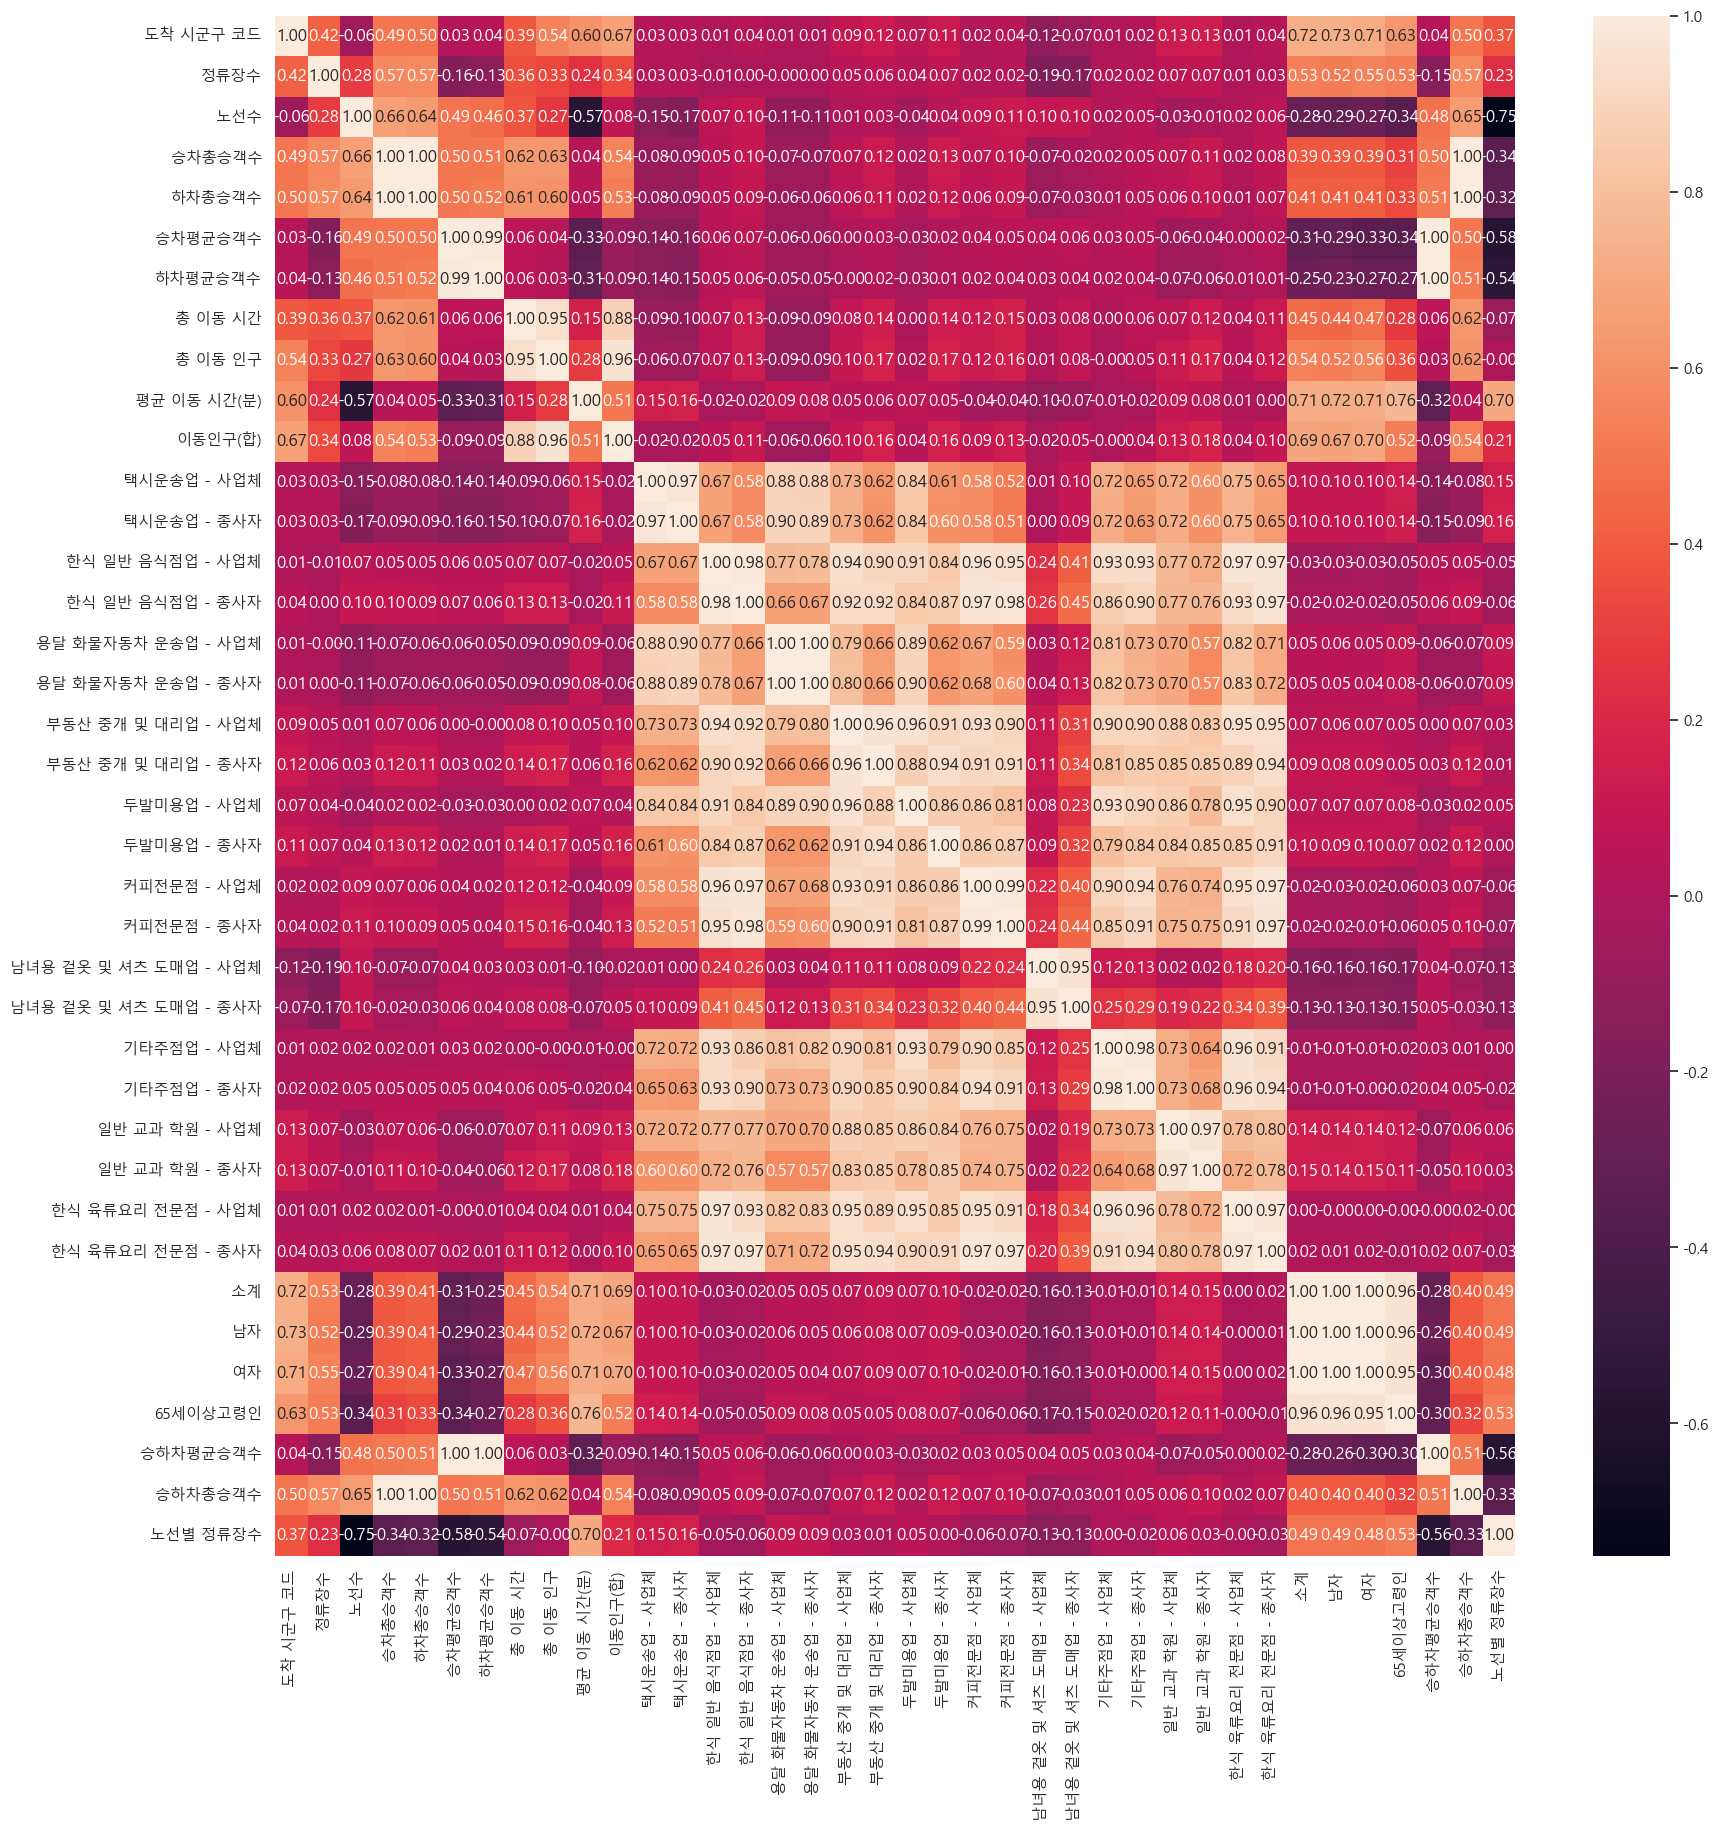

In [110]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

<AxesSubplot:xlabel='노선별 정류장수', ylabel='평균 이동 시간(분)'>

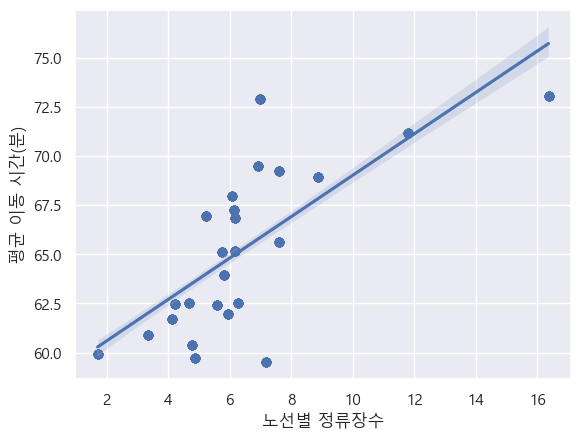

In [117]:
sns.regplot(data = df, x = '노선별 정류장수', y = '평균 이동 시간(분)')

In [118]:
import scipy.stats as spst

result = spst.pearsonr(df['노선별 정류장수'],df['평균 이동 시간(분)'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.7025500730808927, p-value : 6.853799571356707e-68


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? 
- 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다


? 가설마다 라벨데이터가 달라도 상관없나요? 
- 네 그렇습니다

? 가설은 3개만 해야하나요? 
- 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (인당 최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 정류장 수와 승차 총 승객수

    H0 : 정류장 수와 승차 총 승객수는 연관이 없다

    
    H1 : 정류장 수와 승차 총 승객수는 연관이 있다

* 가설 2 노선 수와 총 이동시간

    H0 : 노선 수와 총 이동시간은 연관이 없다

    
    H1 : 노선 수와 총 이동시간은 연관이 있다


* 가설 3 정류장 수와 이동인구(합)

* 가설 4 노선 수와 평균 이동 시간

* 가설 5 노선 수와 커피전문점 이용자수

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

### 1)
> 평균 이동시간 : 가까운 거리를 가는 경우 / 차가 막혀서 오래 걸리는 경우

> 이동 인구 : 사람들이 많이 타고 다닌다는 경우 > 이것에 중점을 맞춰서 분석 진행

* 노선수 - 평균 이동 시간(분) : -0.57 > 노선수가 적은 구에 버스노선을 추가한다.
* 노선별 정류장수 - 하차평균승객수 / 승차평균승객수  > -0.54 / -0.58 > 음의 상관관계 : 노선별 정류장 수가 적은 구에 버스 노선을 추가한다.
* 승하차 총승객수 - 노선수 : 0.65 > 승하차총승객수가 많은 구에 버스노선을 추가한다.
* 일반 교과 학원 사업체 > 강남 / 양천 / 송파 순서 > 학원이 많다는 것은 학생이 많다는 것인데, 이로 이동하는 학생들이 버스를 타고 간다는 가정 > 학교가 끝나고 학원을 가는 경우(16 ~ 17)의 같은지역의 이동인구에서도 확인 할 수 있다. - 상관계수 0.83
* 평일 : 시간 - 같은지역 - 퇴근시간(17 ~19) 이동 인구의 차이가 크고, 평균 이동 시간이 커지는 경우 > 지역을 찾아 버스 노선 설정 필요 : 이동 인구 > 서울시 기업 데이터 찾아야함 X
* 남녀용 겉옷 및 셔츠 도매업 사업체 > 중구에 대부분 분포 > 이에 따라 차량이 아닌 버스를 이용하는 경우가 많다면, 노선 추가 필요 > 분석 방법 X

### 2)
* 교과 학원이 많은 구 > 버스와 관련있지 않을까에 대한 생각
* 연령대 / 심야시간 > 버스시간

#### 가설1
* 학원이 많은구는 승하차승객수와 연관이 있을것이다
* (버스를 많이 이용하거나 or 부모님들이 태우러오시니 버스를 많이 이용하지 않을거다)

#### 가설2
* 심야시간대의 20대 미만의 사람들은 잘 이용하지 않을것이다
* (20대 이상인 사람들은 연관이 있을 것이다)

#### 가설3
* 서비스직종이 많은 구는 승하차승객수가 많을것이다
* <= 생각보다 서비스직종의 범위가 넓어서(운송업도 포함)
* <= 이 가설은 맞지 않는것같다

#### 가설4
* 커피전문점이 많은 구는 승하차승객수가 많을것이다
* (주로 커피전문점은 유동인구가 많은 곳 or 버스정류장에 위치함)



### 3)
* 정류장 수와 총 이동인구합과 관련있다.

### 4)
* 정류장 수 평균 이동시간
* 노선수 승차총승객수
* 노선수 / 승차총승객수 > 강동구에 늘릴 필요가 있어보인다.

### 5)
* 접근성와 운행생산성
* 거주대비 노선 수 
* 운행 생산성 : 노선 거리당 통행지수를 지표로 사용하기 > 총통행자수(이동인구) / 총 노선 거리(이동시간)


## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [114]:
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),택시운송업 - 사업체,택시운송업 - 종사자,한식 일반 음식점업 - 사업체,한식 일반 음식점업 - 종사자,용달 화물자동차 운송업 - 사업체,용달 화물자동차 운송업 - 종사자,부동산 중개 및 대리업 - 사업체,부동산 중개 및 대리업 - 종사자,두발미용업 - 사업체,두발미용업 - 종사자,커피전문점 - 사업체,커피전문점 - 종사자,남녀용 겉옷 및 셔츠 도매업 - 사업체,남녀용 겉옷 및 셔츠 도매업 - 종사자,기타주점업 - 사업체,기타주점업 - 종사자,일반 교과 학원 - 사업체,일반 교과 학원 - 종사자,한식 육류요리 전문점 - 사업체,한식 육류요리 전문점 - 종사자,소계,남자,여자,65세이상고령인,승하차평균승객수,승하차총승객수,노선별 정류장수
0,11010,종로구,345,103,4962972,4787384,116.751088,112.620480,29797989,21031880.41,60.903702,42.986773,215,215,1548,5912,618,646,549,889,261,480,948,3613,400,962,537,1413,110,382,437,1982,141379,68395,72984,27958,229.371568,9750356,3.349515
1,11010,종로구,345,103,4962972,4787384,116.751088,112.620480,29797989,21031880.41,60.903702,42.986773,7,7,230,982,12,12,57,96,28,66,124,525,2,18,74,177,9,34,45,220,141379,68395,72984,27958,229.371568,9750356,3.349515
2,11010,종로구,345,103,4962972,4787384,116.751088,112.620480,29797989,21031880.41,60.903702,42.986773,5,5,42,145,4,4,9,10,0,0,66,243,2,3,3,8,0,0,7,33,141379,68395,72984,27958,229.371568,9750356,3.349515
3,11010,종로구,345,103,4962972,4787384,116.751088,112.620480,29797989,21031880.41,60.903702,42.986773,22,22,26,100,9,9,17,26,8,10,24,62,3,6,7,23,16,59,3,15,141379,68395,72984,27958,229.371568,9750356,3.349515
4,11010,종로구,345,103,4962972,4787384,116.751088,112.620480,29797989,21031880.41,60.903702,42.986773,10,10,31,116,11,11,33,52,19,28,19,62,2,4,26,54,25,71,10,103,141379,68395,72984,27958,229.371568,9750356,3.349515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,11250,강동구,360,22,2769288,2702980,86.337896,84.270616,27616663,22933052.84,73.058795,60.668489,120,120,135,390,73,73,104,163,83,113,54,133,10,86,57,103,66,199,44,164,460067,225221,234846,78340,170.608511,5472268,16.363636
444,11250,강동구,360,22,2769288,2702980,86.337896,84.270616,27616663,22933052.84,73.058795,60.668489,117,436,63,249,89,89,61,108,62,75,34,85,10,788,21,39,35,90,24,101,460067,225221,234846,78340,170.608511,5472268,16.363636
445,11250,강동구,360,22,2769288,2702980,86.337896,84.270616,27616663,22933052.84,73.058795,60.668489,209,372,71,195,153,153,67,107,82,114,29,59,3,6,47,98,31,67,34,98,460067,225221,234846,78340,170.608511,5472268,16.363636
446,11250,강동구,360,22,2769288,2702980,86.337896,84.270616,27616663,22933052.84,73.058795,60.668489,157,187,152,509,144,151,97,188,83,168,63,212,4,17,95,268,24,42,69,245,460067,225221,234846,78340,170.608511,5472268,16.363636


In [24]:
import scipy.stats as spst

result = spst.pearsonr(df['정류장수'],df['승차총승객수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

# 강한 양의 상관관계 
# 귀무가설 기각 
# 정류장수와 승차 총승객수는 상관관계가 있다

상관계수 : 0.5823377131497445, p-value : 0.002256237642798478


상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음

- 음수 똑같음 




p-value 기준을 0.05로 가져갔죠 5% (1%, 0.1%)



p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)



- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 하는데 p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함



In [25]:
spst.pearsonr(df['노선수'],df['총 이동 시간'])
# p-value가 0.05보다 크다 == 귀무가설을 기각하지 못한다 == 대립가설이 틀렸다

PearsonRResult(statistic=0.4130043850381142, pvalue=0.04017599572383831)

In [27]:
spst.pearsonr(df['노선수'],df['커피전문점.1'])
# p-value가 0.05보다 작다 == 귀무가설을 기각한다 == 대립가설이 채택 == 대립가설이 맞았다

PearsonRResult(statistic=0.4655641304206216, pvalue=0.019009277778375622)

In [28]:
df['비율1'] = df['정류장수'] / df['승차총승객수'] * 10000
df.sort_values(by=['비율1']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,...,이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,동별(1),소계,남자,여자,65세이상고령인,비율1
1,11020,중구,172,101,3494802,3333162,109.534320,104.468188,29871978,22491167.48,...,45.107011,6414,3542,982,합계,120437,58563,61874,25055,0.492159
5,11060,동대문구,306,74,4996165,4880047,117.102191,114.380570,28861672,18143542.26,...,38.777036,3566,1472,1082,합계,336644,165755,170889,64468,0.612470
22,11230,강남구,496,95,7605690,7218161,114.536624,108.700696,37840347,48940779.91,...,86.613185,11486,7273,2528,합계,529102,253072,276030,81715,0.652143
20,11210,관악구,465,81,6780412,6924027,130.903566,133.676217,28074220,20121366.16,...,46.655968,3689,2049,1672,합계,486752,244748,242004,82447,0.685799
0,11010,종로구,345,103,4962972,4787384,116.751088,112.620480,29797989,21031880.41,...,42.986773,5912,3613,1413,합계,141379,68395,72984,27958,0.695148


In [29]:
df['비율2'] = df['노선수'] / df['커피전문점.1'] * 10000
df.sort_values(by=['비율2']).head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,...,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,동별(1),소계,남자,여자,65세이상고령인,비율1,비율2
22,11230,강남구,496,95,7605690,7218161,114.536624,108.700696,37840347,48940779.91,...,11486,7273,2528,합계,529102,253072,276030,81715,0.652143,130.620102
24,11250,강동구,360,22,2769288,2702980,86.337896,84.270616,27616663,22933052.84,...,3388,1660,1349,합계,460067,225221,234846,78340,1.299973,132.530120
23,11240,송파구,419,60,5357976,5324379,96.347413,95.743270,34989647,37668693.82,...,5760,3372,1469,합계,658801,317180,341621,103573,0.782012,177.935943
15,11160,강서구,566,48,4599504,4573299,83.868276,83.390449,30658304,24207692.63,...,4584,2530,1709,합계,569166,273203,295963,97128,1.230567,189.723320
13,11140,마포구,554,99,4974656,4697145,93.153119,87.956575,30687734,25683914.30,...,4705,4475,2559,합계,364638,171043,193595,55914,1.113645,221.229050


In [48]:
import seaborn as sns
df.corr()

C:\Users\hardi\AppData\Local\Temp\ipykernel_26724\1509446093.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,소계,남자,여자,65세이상고령인,비율1,비율2
도착 시군구 코드,1.000000,0.452092,-0.056047,0.463750,0.463035,0.009395,0.019338,0.290783,0.475161,0.579626,0.609368,0.308156,0.267956,0.318339,0.684002,0.692380,0.674726,0.591728,-0.006691,-0.235942
정류장수,0.452092,1.000000,0.281447,0.582338,0.587019,-0.196096,-0.165825,0.367728,0.349199,0.252718,0.370426,0.145079,0.206434,0.312111,0.573282,0.557848,0.586317,0.554378,0.356077,0.078095
노선수,-0.056047,0.281447,1.000000,0.671385,0.654298,0.438923,0.416474,0.413004,0.305948,-0.568902,0.105975,0.449945,0.465564,0.285528,-0.261246,-0.275095,-0.247833,-0.324719,-0.522264,0.232330
승차총승객수,0.463750,0.582338,0.671385,1.000000,0.996548,0.447388,0.463199,0.605945,0.609780,0.006762,0.527215,0.603744,0.553745,0.531325,0.379493,0.376140,0.381760,0.302978,-0.509126,0.039422
하차총승객수,0.463035,0.587019,0.654298,0.996548,1.000000,0.445132,0.472936,0.598023,0.592526,0.012475,0.515503,0.573970,0.517638,0.514447,0.399916,0.398561,0.400288,0.327593,-0.498891,0.049146
승차평균승객수,0.009395,-0.196096,0.438923,0.447388,0.445132,1.000000,0.988774,0.010630,-0.008321,-0.297304,-0.133332,0.247787,0.161707,0.189670,-0.351797,-0.333713,-0.367779,-0.357959,-0.693401,0.166163
하차평균승객수,0.019338,-0.165825,0.416474,0.463199,0.472936,0.988774,1.000000,0.024076,-0.010825,-0.285581,-0.127762,0.214479,0.119795,0.184634,-0.293392,-0.272591,-0.312020,-0.296832,-0.673096,0.172187
총 이동 시간,0.290783,0.367728,0.413004,0.605945,0.598023,0.010630,0.024076,1.000000,0.944807,0.030515,0.862730,0.832126,0.837920,0.677013,0.414240,0.394599,0.431526,0.238566,-0.234228,-0.567180
총 이동 인구,0.475161,0.349199,0.305948,0.609780,0.592526,-0.008321,-0.010825,0.944807,1.000000,0.188079,0.959852,0.885345,0.882145,0.685490,0.511784,0.494057,0.527081,0.320308,-0.230233,-0.609705
평균 이동 시간(분),0.579626,0.252718,-0.568902,0.006762,0.012475,-0.297304,-0.285581,0.030515,0.188079,1.000000,0.426853,0.010499,-0.066411,0.039120,0.656348,0.659287,0.652173,0.717774,0.257852,-0.199017


In [42]:
df.columns

Index(['도착 시군구 코드', '자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수',
       '하차평균승객수', '총 이동 시간', '총 이동 인구', '평균 이동 시간(분)', '이동인구(합)',
       '한식 일반 음식점업.1', '커피전문점.1', '기타주점업.1', '동별(1)', '소계', '남자', '여자',
       '65세이상고령인', '비율1', '비율2'],
      dtype='object')

## 4.관계 정리

### 1) 강한 관계의 변수

정류장 - 승차 총 승객수

### 2) 중간 관계의 변수

노선수 - 커피전문점.1(종사자수)

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

중구 - 동대문구 - 강남구 - 관악구에 필요합니다

승객수 대비 정류장수 비율이 매우 낮기 때문입니다!